# EM parameter estimation for Mixture of Beta Binomial Distribution 

Chen Qiao, June 5th, 2020

cqiao@connect.hku.hk

## 1. Math derivations

### 1.1. Derivation of EM steps for Mixture of Beta Binomial Distribution

- Beta-Binomial Distribution (BB):

$$
\begin{align*}
p(y^{(i)} | \theta) &= \int_{0}^{(1)}Bin(n^{(i)},p) \cdot Beta(\alpha, \beta) dp \\
                &= {{n^{(i)}}\choose{y^{(i)}}}\frac{1}{B(\alpha,\beta)} \int_{0}^{1} p^{y^{(i)}+ \alpha -1} (1-p)^{n^{(i)} - y^{(i)} + \beta - 1} dp   \\
                &= {{n^{(i)}}\choose{y^{(i)}}}\frac{B(y^{(i)}+\alpha, n^{(i)}-y^{(i)}+\beta)}{B(\alpha, \beta)}
\end{align*}
$$

- Mixture of Beta-Binomial Distribution (MBB)-joint probablility: suppose there are K components, and let the latent variables be $\mathbf{\gamma} = [\gamma_{0}, \gamma_{1}, ..., \gamma_{k}, \gamma_{K}]$, $\gamma_{k} \text{~} Bin(1, \pi_k)$:

$$
\begin{align*}
p(y^{(i)}, \gamma^{(i)} | \theta, \pi) &= \prod_{k=1}^{K} p(y^{(i)}, \gamma_{k}^{(i)}| \theta_{k}, \pi_k)^{\gamma^{(i)}_k} \\
                                       &= \prod_{k=1}^{K} \{p(y^{(i)} | \theta_{k}) \pi_k \}^{\gamma_k^{(i)}}
\end{align*}
$$

- Log likelihood of the full data (MBB):

$$
\begin{align*}
\log p(y^{(i)}, \gamma^{(i)} | \theta, \pi) &= \sum_{k=1}^{K} \bigg \{ \gamma^{(i)}_k \big(\log\pi_k + \log p(y^{(i)} | \theta_{k}) \big)
\bigg\} 
\end{align*}
$$

### E step:

$$
\begin{align*}
E_{\gamma^{(i)}_k \text{~} p(\gamma_k|y^{(i)}, \pi_k)}[\log p(y^{(i)}, \gamma^{(i)}] &= E\bigg[\sum_{k=1}^{K} \big \{ \gamma^{(i)}_k \big(\log\pi_k + \log p(y^{(i)} | \theta_k) \big)\big\} \bigg] \\
                      &= \sum_{k=1}^{K} \big \{ E[\gamma^{(i)}_k] \big(\log\pi_k + \log p(y^{(i)} | \theta_k) \big)\big\} \\
\end{align*}
$$


The expectation of latent variables are computed as:

$$
\begin{align*}
\bar{\gamma}_k^{(i)} = E(\gamma^{(i)}_k|y^{(i)}, \theta, \pi_k) &= p(\gamma_k = 1| y^{(i)}, \theta, \pi_k)   \text(- Expection of Bernoulli distribution)\\
                                       &= \frac{p(\gamma^{(i)}_k=1, y^{(i)}| \theta, \pi_k)}{\sum_{k=1}^{K}p(\gamma_k^{(i)}=1, y^{(i)}| \theta, \pi_k)} \\
                                       &= \frac{p(y^{(i)}|\gamma^{(i)}_k=1, \theta, \pi_k) \cdot p(\gamma^{(i)}_k=1|\pi_k)}{\sum_{k=1}^{K}p(y^{(i)}|\gamma^{(i)}_k=1, \theta, \pi_k) \cdot p(\gamma^{(i)}_k=1|\pi_k)} \\
                                       &= \frac{ {{n^{(i)}}\choose{y^{(i)}}} \frac{B(y^{(i)} + \alpha_k, n^{(i)}-y^{(i)} + \beta_k)}{B(\alpha_k, \beta_k)} \cdot \pi_k}{ \sum_{k=1}^{K}{{n^{(i)}}\choose{y^{(i)}}} \frac{B(y^{(i)} + \alpha_k, n^{(i)}-y^{(i)} + \beta_k)}{B(\alpha_k, \beta_k)} \cdot \pi_k} \\
                                       &= \frac{\frac{B(y^{(i)} + \alpha_k, n^{(i)}-y^{(i)} + \beta_k)}{B(\alpha_k, \beta_k)} \cdot \pi_k}{ \sum_{k=1}^{K} \frac{B(y^{(i)} + \alpha_k, n^{(i)}-y^{(i)} + \beta_k)}{B(\alpha_k, \beta_k)} \cdot \pi_k}
\end{align*}
$$

### M step
M-step hence is to optimize:

$$
\begin{align*}
 &\max_{\pi, \theta}\bigg\{\sum_{k=1}^{K} \big \{ \bar{\gamma}_k^{(i)} \big(\log\pi_k + \log p(y^{(i)} | \theta_k) \big)\big\} \bigg\} \\
 = &\max_{\pi, \theta}\bigg\{ \sum_{k=1}^{K} \big \{ \bar{\gamma}_k^{(i)} \big(\log\pi_k + \log{{n^{(i)}}\choose{y^{(i)}}} + \log B(y^{(i)}+\alpha_k, n^{(i)}-y^{(i)}+\beta_k) - \log{B(\alpha_k, \beta_k)} \big)\big\} \bigg\} \\
s.t. &\sum_{k=1}^{K} \pi_k = 1, \\ &\pi_k \geq 0, k=1,...,K\\ &\alpha > 0, \\ &\beta > 0
\end{align*}
$$


Using all the data points:

$$
\begin{align*}
&\max_{\pi, \theta}\bigg\{ \sum_{i=1}^{N}\sum_{k=1}^{K} \big \{ \bar{\gamma}_k^{(i)} \big(\log\pi_k + \log{{n^{(i)}}\choose{y^{(i)}}} + \log B(y^{(i)}+\alpha_k, n^{(i)}-y^{(i)}+\beta_k) - \log{B(\alpha_k, \beta_k)} \big)\big\} \bigg\} \\
&s.t. \sum_{k=1}^{K} \pi_k = 1 \\ &\pi_k \geq 0, k=1,...,K \\ &\alpha > 0, \\ &\beta > 0
\end{align*}
$$

### 1.2. Derivation of EM steps for Mixture of Binomial Model

### Q function:
$$
\begin{align}
E_{\gamma^{(i)}_k \text{~} P(\gamma_k;y^{(i)}, \pi_k)}[\sum_{i=1}^{N} \log p(y^{(i)}, \gamma^{(i)}_k|n^{(i)}, p_k, \pi_k)] &= \sum_{i=1}^{N} \sum_{k=1}^K E[\gamma^{(i)}_k] \big [ \log {{n^{(i)}}\choose{y^{(i)}}} + y^{(i)} \log(p_k) + (n^{(i)}-y^{(i)}) \log(1-p_k) + \log \pi_k \big]
\end{align}
$$

### E step:
$$
\begin{align}
   \bar{\gamma}^{(i)}_k &=  E[\gamma^{(i)}_k]
                        &=  \frac{p^{y^{(i)}}_k (1-p_k)^{n^{(i)}-y^{(i)}} \cdot \pi_k}{\sum_{k=1}^K p^{y^{(i)}}_k (1-p_k)^{n^{(i)}-y^{(i)}} \cdot \pi_k}
\end{align}
$$

### M step, 
M step has analytical solution, (construct Lagrangian using $\sum_{k=1}^K \pi_k = 1$, etc., solving by letting the derivations equal to zero):
$$
\begin{align}
\pi_k &= \frac{\sum_{i=1}^N \bar{\gamma}^{(i)}_k}{\sum_{i=1}^{N} \sum_{k=1}^K \bar{\gamma}^{(i)}_k} \\
      &= \frac{\sum_{i=1}^N \bar{\gamma}^{(i)}_k}{N} \\
p_k &= \frac{\sum_{i=1}^{N} y^{{(i)}}\bar{\gamma}^{(i)}_k}{\sum_{i=1}^{N} n^{{(i)}}\bar{\gamma}^{(i)}_k}
\end{align}
$$

## 2. Simulation experiments for parameter estimation 

In [1]:
import numpy as np
from scipy.stats import betabinom, bernoulli, binom
import sys, time
import matplotlib.pyplot as plt
from bbmix.models import MixtureBinomial
from bbmix.models import MixtureBetaBinomial
np.random.seed(42)

### 2.1. Parameter estimation for mixture of Binomial model

In [2]:
## simulation experiment
# sample gammars
# sample events using componet binomial models

n_samples = 2000
n_trials = 1000
pis = [0.6, 0.4]
p1, p2 = 0.4, 0.8

gammars = bernoulli.rvs(pis[0], size=n_samples)
n_pos_events = sum(gammars)
n_neg_events = n_samples - n_pos_events

ys_of_type1 = binom.rvs(n_trials, p1, size=n_pos_events)
ys_of_type2 = binom.rvs(n_trials, p2, size=n_neg_events)


ys = np.concatenate((ys_of_type1, ys_of_type2))
ns = np.ones(n_samples, dtype=np.int) * n_trials
len(ys), len(ns)

(2000, 2000)

[0.79918115 0.399541   0.4085     0.5915    ]
0.4 0.8 [0.6, 0.4]
{'BIC': 19123.029046695476, 'ICL': 19136.810494654314}
Final training loss: 9546.312718428653


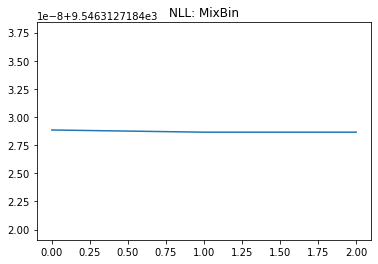

In [3]:
# parameter estimation using EM

em_mb = MixtureBinomial(
     n_components=2,
     tor=1e-20)

# t = time.time()
params = em_mb.EM((ys, ns), max_iters=250, early_stop=True)
print(params)
print(p1, p2, pis)
print(em_mb.model_scores)
plt.subplot(1, 1, 1)
plt.plot(em_mb.losses)
print("Final training loss: {}".format(em_mb.losses[-1]))
# print("Time cost: {}".format(time.time() - t))
plt.title("NLL: MixBin")
plt.show()

### 2.2. Parameter estimation for mixture of Beta-Binomial models

In [4]:
## simulation experiment
# sample gammars
# sample events using component Beta-Binomial models

n_samples = 2000
n_trials = 1000
pis = [0.6, 0.4]
alphas, betas = [2, 0.9], [0.1, 5]

gammars = bernoulli.rvs(pis[0], size=n_samples)
n_pos_events = sum(gammars)
n_neg_events = n_samples - n_pos_events

ys_of_type1 = betabinom.rvs(n_trials, alphas[0], betas[0], size=n_pos_events)
ys_of_type2 = betabinom.rvs(n_trials, alphas[1], betas[1], size=n_neg_events)


ys = np.concatenate((ys_of_type1, ys_of_type2))
ns = np.ones(n_samples, dtype=np.int) * n_trials
len(ys), len(ns)

(2000, 2000)

In [5]:
em_mbb = MixtureBetaBinomial(
     n_components=2,
     max_m_step_iter=250,
     tor=1e-20)

#### 2.2.1. Random initialization

[0.96451212 1.24419077 5.74805311 0.0873598  0.35451876 0.64548124]
[2, 0.9] [0.1, 5] [0.6, 0.4]
{'BIC': 801914.0131014474, 'ICL': 801927.9266825272}
Final training loss: 400934.20384334505


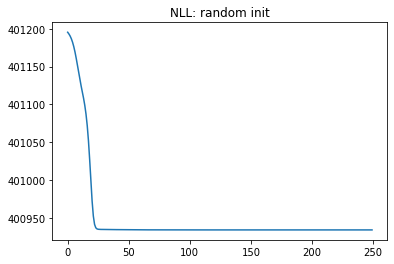

In [6]:
# t = time.time()
params = em_mbb.EM((ys, ns), max_iters=250, init_method="random", early_stop=False)
print(params)
print(alphas, betas, pis)
print(em_mbb.model_scores)
plt.subplot(1, 1, 1)
plt.plot(em_mbb.losses)
print("Final training loss: {}".format(em_mbb.losses[-1]))
# print("Time cost: {}".format(time.time() - t))
plt.title("NLL: random init")
plt.show()

#### 2.2.2. K-means initialization

[1.3007287  0.96046346 0.08769655 5.67438122 0.64320866 0.35679134]
[2, 0.9] [0.1, 5] [0.6, 0.4]
{'BIC': 801914.0201176095, 'ICL': 801927.9283498813}
Final training loss: 400934.2073514261


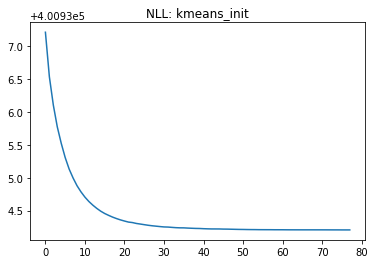

In [7]:
# t = time.time()
params = em_mbb.EM((ys, ns), max_iters=250, init_method="kmeans")
print(params)
print(alphas, betas, pis)
print(em_mbb.model_scores)
plt.subplot(1, 1, 1)
plt.plot(em_mbb.losses)
print("Final training loss: {}".format(em_mbb.losses[-1]))
# print("Time cost: {}".format(time.time() - t))
plt.title("NLL: kmeans_init")
plt.show()

#### 2.2.3. Initialization with mixture of Binomial modeling

[0.96141955 1.28773429 5.69101461 0.08761989 0.35629533 0.64370467]
[2, 0.9] [0.1, 5] [0.6, 0.4]
{'BIC': 801914.0145127898, 'ICL': 801927.9239305675}
Final training loss: 400934.20454901626


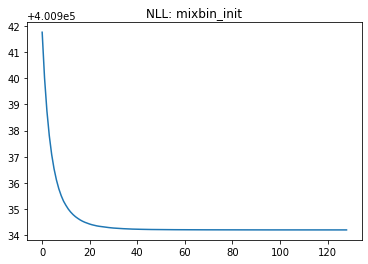

In [8]:
# t = time.time()
params = em_mbb.EM((ys, ns), max_iters=500, init_method="mixbin")
print(params)
print(alphas, betas, pis)
print(em_mbb.model_scores)
plt.subplot(1, 1, 1)
plt.plot(em_mbb.losses)
print("Final training loss: {}".format(em_mbb.losses[-1]))
# print("Time cost: {}".format(time.time() - t))
plt.title("NLL: mixbin_init")
plt.show()

## 3. Model selection

In [9]:
import bbmix

### 3.1. Likelihood ratio

In [10]:
em_mbb1 = MixtureBetaBinomial(n_components=1, max_m_step_iter=250, tor=1e-2) #lenient tolerant for many tests
em_mbb2 = MixtureBetaBinomial(n_components=2, max_m_step_iter=250, tor=1e-2) #lenient tolerant for many tests

params1 = em_mbb1.EM((ys, ns), max_iters=500, init_method="mixbin", early_stop=True)
params2 = em_mbb2.EM((ys, ns), max_iters=500, init_method="mixbin", early_stop=True)

In [11]:
## alternative model 2 components VS null model 1 component

print(em_mbb1.losses[-1], em_mbb2.losses[-1])

p_val = bbmix.models.LR_test(em_mbb1.losses[-1] - em_mbb2.losses[-1], df = 3)
print("p value to reject the alternative model: %.3e" %(p_val))

401201.32619559806 400934.2817481711
p value to reject the alternative model: 1.953e-115


### 3.2. BIC vs number of mixture components

In [12]:
## A BIC plot vs n_components would be more commonly used in model selection
BICs, n_components = [], list(range(1,5))
for n_cmpts in n_components:
    em_mbb = MixtureBetaBinomial(n_components=n_cmpts, 
                                 max_m_step_iter=250, 
                                 tor=1e-2) #lenient tolerant for many tests
    em_mbb.EM((ys, ns), max_iters=500, init_method="mixbin", early_stop=True)
    BICs.append(em_mbb.model_scores["BIC"])


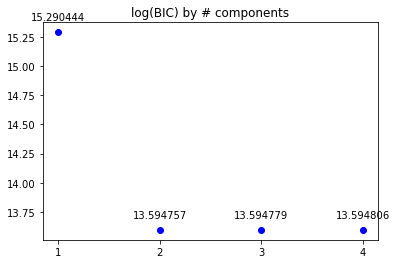

In [13]:
BICs = np.array(BICs)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(n_components, np.log(BICs), 'bo')
plt.xticks(range(1, len(n_components)+1), n_components)
for i, v in enumerate(np.log(BICs), 1):
    ax.text(i, v+1e-1, "%f" %v, ha="center")
plt.title("log(BIC) by # components")
plt.show()